## Gautam Kumar
## 21CS30020
## Naive Bayes Implementation

In [1]:
from ucimlrepo import fetch_ucirepo
from tabulate import tabulate
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import random
from collections import Counter
import seaborn as sns


## Part A

In [2]:
def roll_biased_die(k):
    probs = [1/(2**(i-1)) for i in range(2, k+1)]  # Probabilities for faces 2 to k
    probs = [1/(2**(k-1))] + probs  # Add probability for face 1 at the beginning
    return random.choices(range(1, k+1), probs, k=1)[0]

In [3]:
def simulate_rolls(k, num_rolls_per_simulation, num_simulations):
    results = []
    for _ in range(num_simulations):
        rolls = [roll_biased_die(k) for _ in range(num_rolls_per_simulation)]
        total = sum(rolls)
        results.append(total)
    return results

In [4]:
def plot_histogram(results, num_simulations, num_rolls):
    sns.set(style="whitegrid")  # Use Seaborn's style
    plt.figure(figsize=(10, 6))  # Set the figure size

    sns.histplot(results, bins=range(num_rolls, num_rolls * k + 2), kde=True, stat="probability", color='darkblue')
    plt.xlabel('Sum of Upward Face Values')
    plt.ylabel('Probability')
    plt.title(f'Distribution of Sum (k={k}, rolls={num_rolls}, simulations={num_simulations})')
    plt.show()

In [5]:
def calculate_theoretical_expected_value(k, num_rolls):
    return sum([i * (1 / (2 ** (i - 1))) for i in range(2, k + 1)]) * num_rolls

## function to find the five_number summary
def five_number_summary(data):
    return np.percentile(data, [0, 25, 50, 75, 100])

def top_level_function(k,num_rolls_a, num_simulations_a):
    results_a = simulate_rolls(k, num_rolls_a, num_simulations_a)
    plot_histogram(results_a, num_simulations_a, num_rolls_a)
    expected_value_theoretical_a = calculate_theoretical_expected_value(k, num_rolls_a)
    expected_value_actual_a = np.mean(results_a)
    summary_a = five_number_summary(results_a)
    print(f"Theoretical Expected Value: {expected_value_theoretical_a}")
    print(f"Actual Expected Value (Simulation): {expected_value_actual_a}")
    print(f"Five-Number Summary: {summary_a}")

###  Function calls
#### 1. K=4 , number of rolls = 4, number of simulations = 1000;

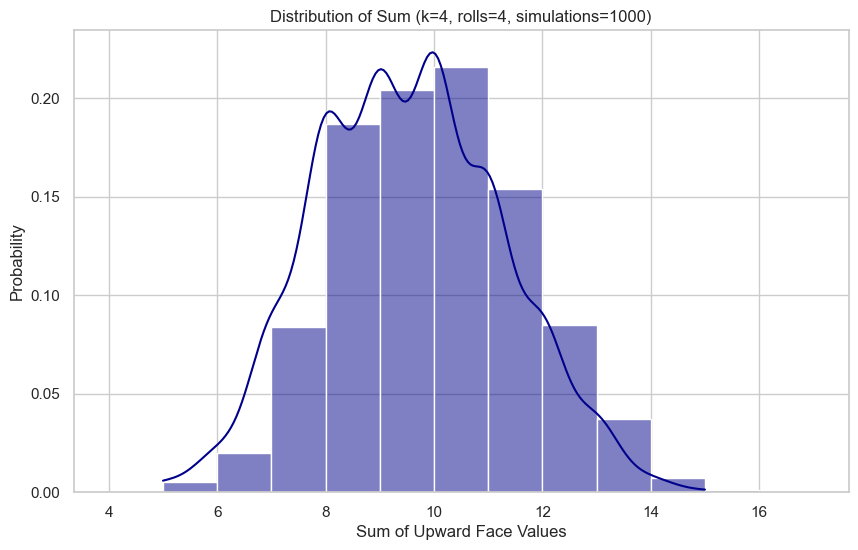

Theoretical Expected Value: 9.0
Actual Expected Value (Simulation): 9.533
Five-Number Summary: [ 5.   8.   9.5 11.  15. ]


In [6]:
k = 4
num_rolls_a = 4
num_simulations_a = 1000
top_level_function(k,num_rolls_a, num_simulations_a)

#### 1. K=4 , number of rolls = 8, number of simulations = 1000;

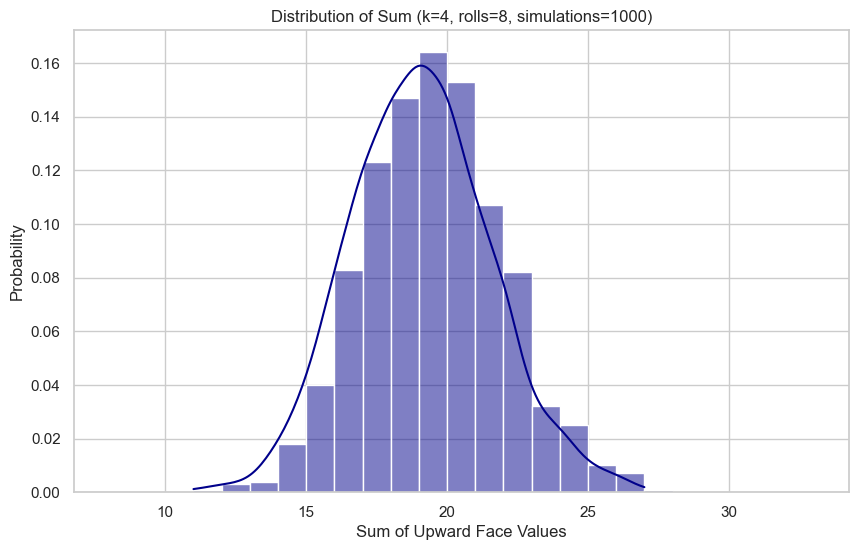

Theoretical Expected Value: 18.0
Actual Expected Value (Simulation): 19.038
Five-Number Summary: [11. 17. 19. 21. 27.]


In [7]:
k = 4
num_rolls_a = 8
num_simulations_a = 1000
top_level_function(k,num_rolls_a, num_simulations_a)

#### 1. K=16 , number of rolls = 4, number of simulations = 1000;k = 16


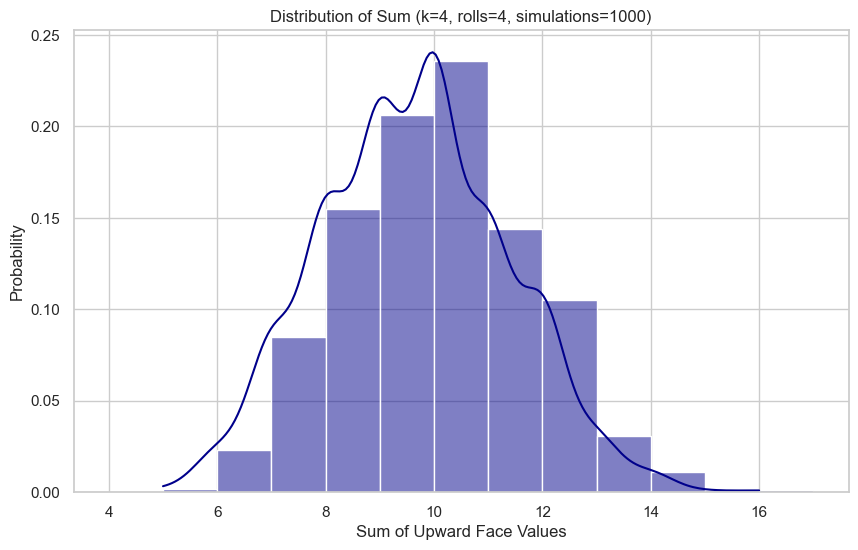

Theoretical Expected Value: 9.0
Actual Expected Value (Simulation): 9.629
Five-Number Summary: [ 5.  8. 10. 11. 16.]


In [8]:
num_rolls_a = 4
num_simulations_a = 1000
top_level_function(k,num_rolls_a, num_simulations_a)

#### 1. K=16 , number of rolls = 8, number of simulations = 1000;

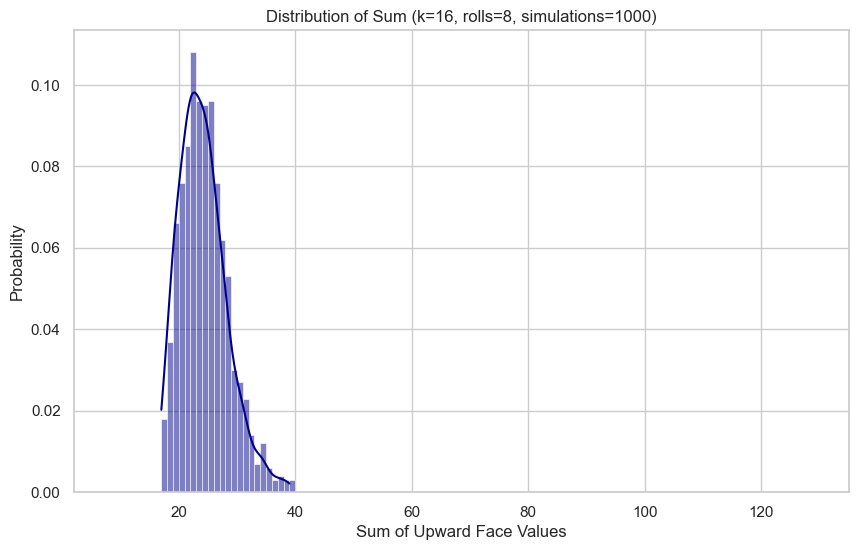

Theoretical Expected Value: 23.99560546875
Actual Expected Value (Simulation): 24.106
Five-Number Summary: [17. 21. 24. 26. 39.]


In [9]:
k = 16
num_rolls_a = 8
num_simulations_a = 1000
top_level_function(k,num_rolls_a, num_simulations_a)

## Part B

In [10]:
spambase = fetch_ucirepo(id=94)

In [11]:
X = spambase.data.features
y = spambase.data.targets

In [12]:
X.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test,
test_size=0.5, random_state=42)

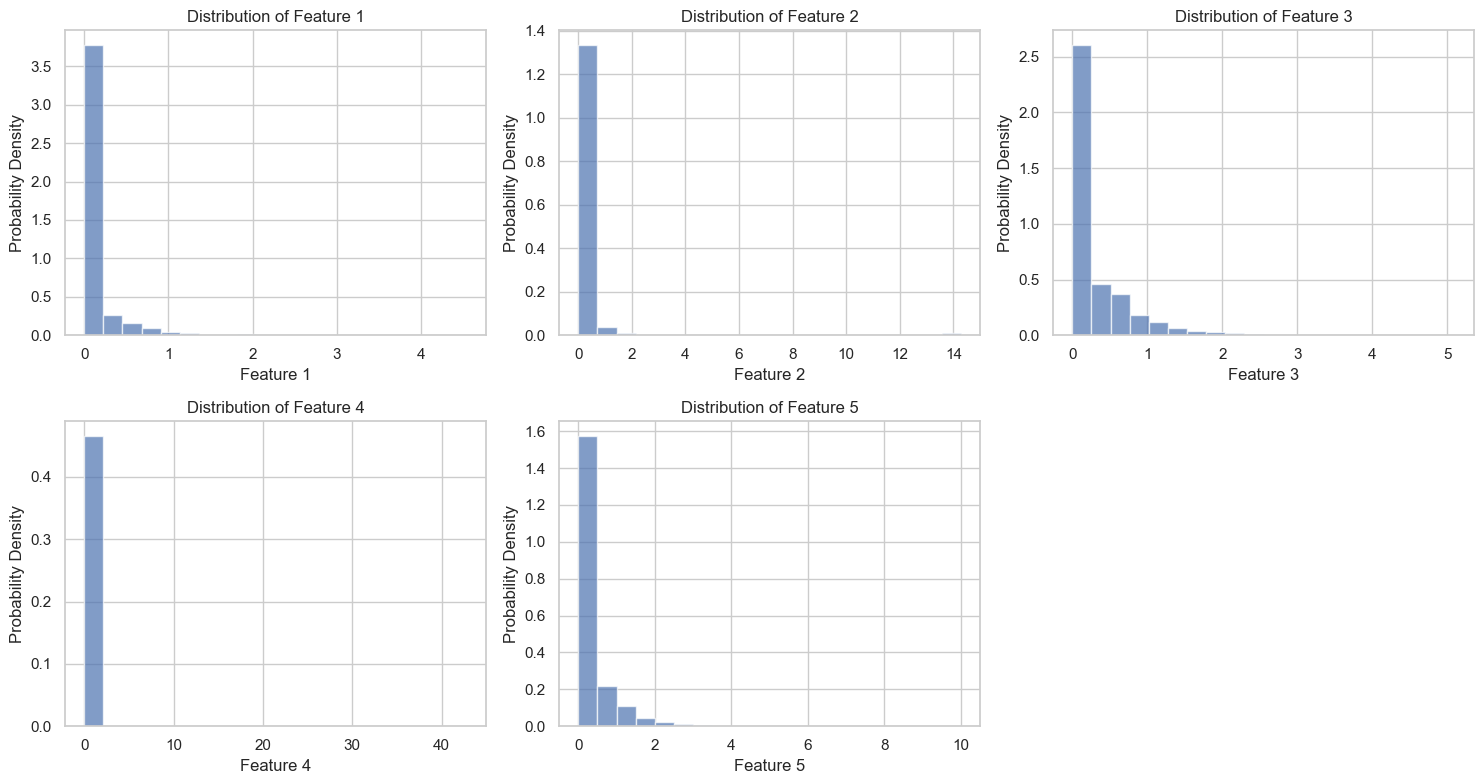

In [14]:
# selected_columns = ['word_freq_hp', 'word_freq_make', 'word_freq_internet', 'word_freq_mail', 'word_freq_all']
X_ = X.to_numpy()
selected_columns = [X_[:, 0], X_[:, 1], X_[:, 2], X_[:, 3], X_[:, 4]]

plt.figure(figsize=(15, 8))

for i, column_data in enumerate(selected_columns):
    plt.subplot(2, 3, i + 1)
    plt.hist(column_data, bins=20, density=True, alpha=0.7)
    plt.title(f'Distribution of Feature {i+1}')
    plt.xlabel(f'Feature {i+1}')
    plt.ylabel('Probability Density')

plt.tight_layout()
plt.show()

In [15]:
class Naive_bayes :
    
    def __init__(self) :
        self.no_of_features = 0
        self.mean_list = [[],[]]
        self.var_list = [[],[]]
        self.p = [[],[]]
        self.y_pred = []
        self.no_of_parameters = 0
        
    def fit(self,X_train,y_train) :
        self.no_of_features = X_train.shape[1]
        sum1 = np.sum(y_train,axis=0)
        self.p[1] = sum1/y_train.shape[0]
        self.p[0] = 1-self.p[1]
        for i in range(self.no_of_features) :
            self.mean_list[1].append(np.mean(X_train.loc[(y_train['Class']==1),X_train.columns[i]]))
            self.mean_list[0].append(np.mean(X_train.loc[(y_train['Class']==0),X_train.columns[i]]))
            self.var_list[1].append(np.var(X_train.loc[(y_train['Class']==1),X_train.columns[i]]))
            self.var_list[0].append(np.var(X_train.loc[(y_train['Class']==0),X_train.columns[i]]))
            
        
        self.mean_list[1] = np.array(self.mean_list[1])
        self.mean_list[0] = np.array(self.mean_list[0])  
        self.var_list[1] = np.array(self.var_list[1])
        self.var_list[0] = np.array(self.var_list[0])
        
        self.no_of_parameters = 2*self.no_of_features + 2
        
    def predict(self,X_test) :
        for i in range(X_test.shape[0]) :
            p1 = np.prod((1/np.sqrt(2*np.pi*self.var_list[1]))*np.exp(-((X_test.iloc[i,:]-self.mean_list[1])**2)/(2*self.var_list[1])))
            p0 = np.prod((1/np.sqrt(2*np.pi*self.var_list[0]))*np.exp(-((X_test.iloc[i,:]-self.mean_list[0])**2)/(2*self.var_list[0])))
            
            if (p1*self.p[1] > p0*self.p[0]).all():
                self.y_pred.append(1)
            else :
                self.y_pred.append(0)
        # return np array
        return self.y_pred


In [16]:
# Initialize and fit the Naive Bayes classifier
nb_classifier = Naive_bayes()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb_classifier.predict(X_test)
print(y_pred[:20])

C:\Users\GKS\AppData\Local\Temp\ipykernel_16312\1708062161.py:32: RuntimeWarning: divide by zero encountered in divide
  p1 = np.prod((1/np.sqrt(2*np.pi*self.var_list[1]))*np.exp(-((X_test.iloc[i,:]-self.mean_list[1])**2)/(2*self.var_list[1])))


[0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0]


In [17]:
def print_res(y_test, y_pred):
    y_test = np.ravel(y_test)
    y_pred = np.ravel(y_pred)
    f1 = f1_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recal = recall_score(y_test, y_pred)

    table = [["Metrics", "Value"],
             ["Accuracy", acc],
             ["Precision", prec],
             ["Recall", recal],
             ["F1-score", f1]]

    print(tabulate(table, headers="firstrow", tablefmt="fancy_grid"))
print("The Accuracy Scores without log transformations")
print_res(y_test,y_pred)

The Accuracy Scores without log transformations
╒═══════════╤══════════╕
│ Metrics   │    Value │
╞═══════════╪══════════╡
│ Accuracy  │ 0.817656 │
├───────────┼──────────┤
│ Precision │ 0.709424 │
├───────────┼──────────┤
│ Recall    │ 0.947552 │
├───────────┼──────────┤
│ F1-score  │ 0.811377 │
╘═══════════╧══════════╛


In [18]:
X_train_new = np.log(X_train+1)
X_test_new = np.log(X_test+1)
X_train_new.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
958,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.792993,0.000000,0.0,0.792993,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.984323,2.772589,4.060443
1533,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.188966,0.0,0.348542,0.188966,0.000000,1.571113,2.833213,4.127134
654,0.285179,0.000000,0.285179,0.0,0.000000,0.000000,0.506818,0.000000,0.0,0.000000,...,0.0,0.0,0.109751,0.0,0.340749,0.381172,0.298622,2.070905,3.784190,6.242223
1497,0.418710,0.837248,0.231112,0.0,1.360977,0.231112,0.582216,0.231112,0.0,0.582216,...,0.0,0.0,0.129272,0.0,0.044973,0.000000,0.000000,1.369657,4.110874,4.912655
3844,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,2.708050,3.988984,4.043051


In [19]:
nb_classifier_new = Naive_bayes()
nb_classifier_new.fit(X_train_new, y_train)

# Make predictions on the test data
y_pred = nb_classifier_new.predict(X_test_new)
print(type(X_train_new), type(y_train), type(X_test_new))

C:\Users\GKS\AppData\Local\Temp\ipykernel_16312\1708062161.py:32: RuntimeWarning: divide by zero encountered in divide
  p1 = np.prod((1/np.sqrt(2*np.pi*self.var_list[1]))*np.exp(-((X_test.iloc[i,:]-self.mean_list[1])**2)/(2*self.var_list[1])))


<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [20]:
print("The Accuracy Scores with log transformations")
print_res(y_test,y_pred)

The Accuracy Scores with log transformations
╒═══════════╤══════════╕
│ Metrics   │    Value │
╞═══════════╪══════════╡
│ Accuracy  │ 0.845152 │
├───────────┼──────────┤
│ Precision │ 0.745205 │
├───────────┼──────────┤
│ Recall    │ 0.951049 │
├───────────┼──────────┤
│ F1-score  │ 0.835637 │
╘═══════════╧══════════╛


## Part C

In [21]:
from sklearn.naive_bayes import GaussianNB

In [22]:
X = spambase.data.features
y = spambase.data.targets

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test,
test_size=0.5, random_state=42)

In [24]:
guassian_model = GaussianNB()

In [25]:
guassian_model.fit(X_train , y_train)
predicted_test = guassian_model.predict(X_test)
predicted_test=np.ravel(predicted_test)
y_test=np.ravel(y_test)
print("The Accuracy Scores without log transformations")
print_res(y_test,predicted_test)

The Accuracy Scores without log transformations
╒═══════════╤══════════╕
│ Metrics   │    Value │
╞═══════════╪══════════╡
│ Accuracy  │ 0.827786 │
├───────────┼──────────┤
│ Precision │ 0.71916  │
├───────────┼──────────┤
│ Recall    │ 0.958042 │
├───────────┼──────────┤
│ F1-score  │ 0.821589 │
╘═══════════╧══════════╛


C:\Users\GKS\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
all_columns = X.columns.tolist()
X_train_new = np.log(X_train+1)
X_test_new = np.log(X_test+1)
X_val_new = np.log(X_val+1)
X_train_new.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
958,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.792993,0.000000,0.0,0.792993,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.984323,2.772589,4.060443
1533,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.188966,0.0,0.348542,0.188966,0.000000,1.571113,2.833213,4.127134
654,0.285179,0.000000,0.285179,0.0,0.000000,0.000000,0.506818,0.000000,0.0,0.000000,...,0.0,0.0,0.109751,0.0,0.340749,0.381172,0.298622,2.070905,3.784190,6.242223
1497,0.418710,0.837248,0.231112,0.0,1.360977,0.231112,0.582216,0.231112,0.0,0.582216,...,0.0,0.0,0.129272,0.0,0.044973,0.000000,0.000000,1.369657,4.110874,4.912655
3844,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,2.708050,3.988984,4.043051


In [27]:
guassian_model_new = GaussianNB()
guassian_model_new.fit(X_train_new , y_train)
predicted_test = guassian_model_new.predict(X_test_new)
predicted_test=np.ravel(predicted_test)
print("The Accuracy Scores with log transformations")
print_res(y_test,predicted_test)

The Accuracy Scores with log transformations
╒═══════════╤══════════╕
│ Metrics   │    Value │
╞═══════════╪══════════╡
│ Accuracy  │ 0.839363 │
├───────────┼──────────┤
│ Precision │ 0.737127 │
├───────────┼──────────┤
│ Recall    │ 0.951049 │
├───────────┼──────────┤
│ F1-score  │ 0.830534 │
╘═══════════╧══════════╛


C:\Users\GKS\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


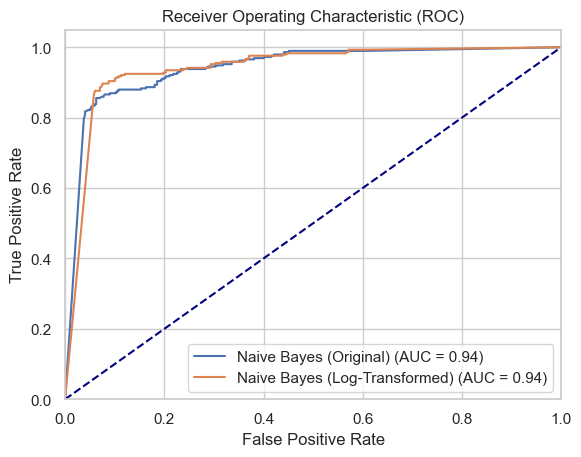

In [28]:
from sklearn.metrics import accuracy_score, roc_curve, auc
def plot_roc_curve(model, X, y, label, linestyle='-'):
    y_score = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linestyle, label=f'{label} (AUC = {roc_auc:.2f})')

plt.figure()
plot_roc_curve(guassian_model, X_val, y_val, 'Naive Bayes (Original)')
plot_roc_curve(guassian_model_new, X_val_new, y_val, 'Naive Bayes (Log-Transformed)')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()